In [178]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted',color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

In [179]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder,MinMaxScaler 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor 
from sklearn.impute import SimpleImputer 
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, confusion_matrix,recall_score

In [180]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')
# data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')


In [181]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [182]:
data.isna().sum() * 100/len(data)

data.duplicated().sum()
data.drop_duplicates(subset=None, inplace=True,ignore_index=False,keep='first')
data.duplicated().sum()

# data.to_csv('prac4.csv')

0

In [183]:
# data.describe()

In [184]:
orig_val_sex = data.sex
cat_val = ['sex','smoker', 'region']

data[cat_val] = data[cat_val].apply(LabelEncoder().fit_transform)

le_val_sex = data.sex 

orig_dic_sex = np.unique(orig_val_sex)
le_dic_sex = np.unique(le_val_sex)

sex_dic = dict(zip(orig_dic_sex,le_dic_sex))
# sex_dic

In [185]:
# data.corr()['charges'].sort_values(ascending=False)

<AxesSubplot:title={'center':'Data Correlation Matrix'}>

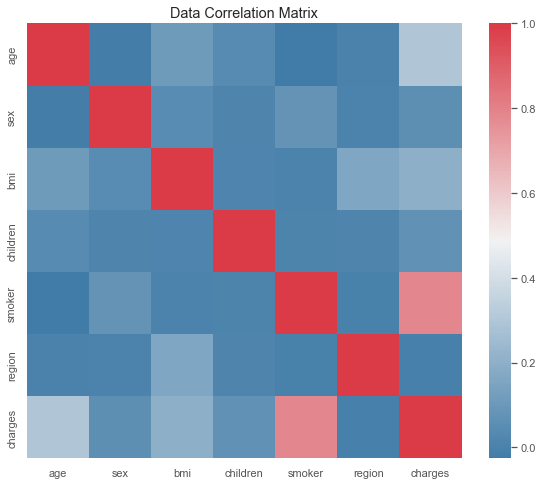

In [186]:
f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Data Correlation Matrix')

data_corr = data.corr()

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax)

<AxesSubplot:xlabel='charges', ylabel='Count'>

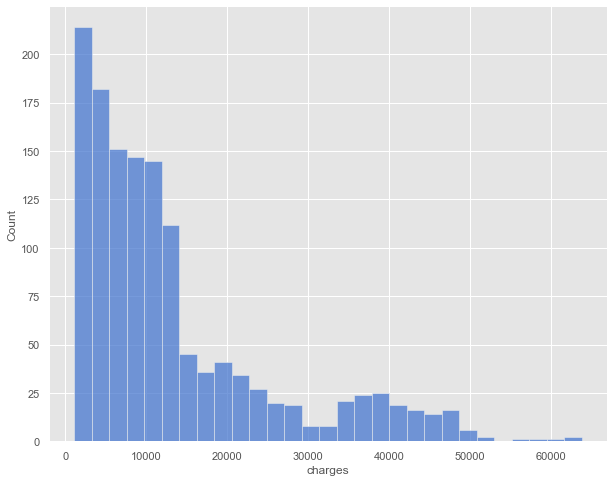

In [187]:
f,ax = plt.subplots(figsize=(10,8)) 

sns.histplot(data.charges, color='b', ax=ax)

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

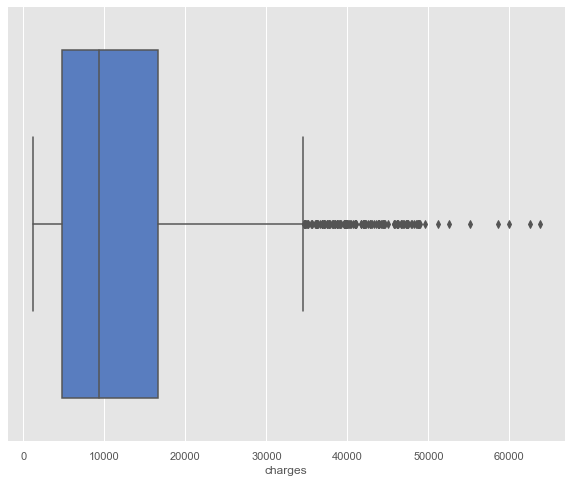

In [188]:
f,ax = plt.subplots(figsize=(10,8)) 

sns.boxplot(data.charges, color='b', ax=ax)

<AxesSubplot:title={'center':'Charges to Male Table'}, xlabel='charges', ylabel='Count'>

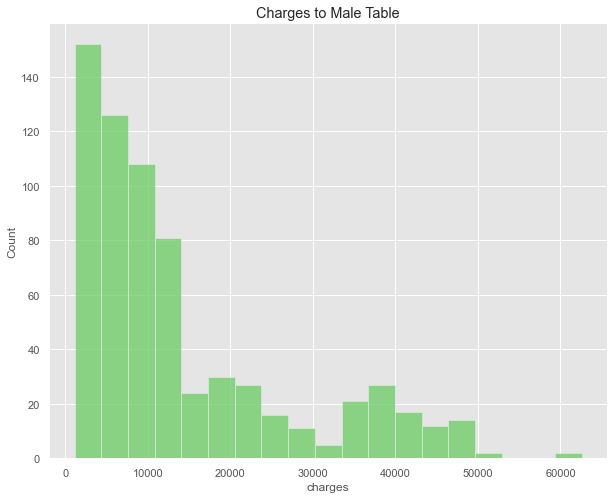

In [189]:
f,ax = plt.subplots(figsize=(10,8))  

ax.set_title('Charges to Male Table')

sns.histplot(data[(data.sex == 1)]['charges'], color='g', ax=ax)

In [190]:
x= data.drop(columns=['charges'], axis=1)
y= data.charges

In [191]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(np.array(y).reshape(-1,1))

In [192]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [193]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

y_pred = linreg.predict(x_test)

lin_r2_test = r2_score(y_test,y_pred).round(3)
lin_mse_test = mean_squared_error(y_test,y_pred).round(3)

mod_perf = pd.DataFrame([ 
    'LinearRegression', lin_r2_test,lin_mse_test
]).transpose()
mod_perf.columns = ['Method', 'R2_Score Test', 'Mse Test']
mod_perf


,Method,R2_Score Test,Mse Test
0,LinearRegression,0.772,0.266


In [194]:
ran_for = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42, criterion='squared_error')

ran_for.fit(x_train,y_train)
y_pred = ran_for.predict(x_test)
ranfor_mse = mean_squared_error(y_test,y_pred).round(3)
ranfor_r2 = r2_score(y_test,y_pred).round(3) 

mode_perf = pd.DataFrame([ 
    'RandomForestRegressor', ranfor_mse, ranfor_r2
]).transpose()
mode_perf.columns =['Method', 'Mse Forest Test', 'R2 Forest Test']
mode_perf




C:\Users\amunv\AppData\Local\Temp\ipykernel_21200\3098002996.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_for.fit(x_train,y_train)


,Method,Mse Forest Test,R2 Forest Test
0,RandomForestRegressor,0.16,0.863


# CLASSIFICATION

In [195]:
df = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')

In [196]:
df.isna().sum() * 100 /len(df)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64